In [45]:
print(__doc__)

# Code source adapted from: Jaques Grobler
# License: BSD 3 clause

import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import os
import csv
import time
from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.preprocessing import normalize

import pprint

pp = pprint.PrettyPrinter(indent=4)

Automatically created module for IPython interactive environment


In [25]:
def graph_add_scatter(x, y, c='black'):
    plt.scatter(x, y, color= c)

def graph_add_line(x, y, c='black'):
    plt.plot(x, y, color=c, linewidth=3)

def plot(name=""):
    plt.xticks()
    plt.yticks()
    
    if name!="":
        plt.savefig(name)
    plt.show()
    plt.close()

def GetGroup(labels, group):
    indexes = []
    for i in range(len(labels)):
        if labels[i] == group:
            indexes.append(i)
    return indexes

class DataReader():
    def __init__(self, file_path="health-dataset/health.txt"):
        f = open(file_path)
        self.lines = []
        for i, line in enumerate(f):
            self.lines.append(line)
    
    def GetLine(self, line):
        if line < 0 and line >= len(self.lines):
            return str(line) + " Is Not a Valid Line"
        return self.lines[line]
    
    def GetLineGroup(self, lines):
        t = []
        for i in range(len(lines)):
            t.append(self.GetLine(lines[i]))
        return t

data_reader = DataReader()

# Read Dataset

In [49]:
# Read and treat training dataset
dataset = pandas.read_csv('health-dataset/bags.csv').values
# dataset = (dataset-dataset.max()/2) / dataset.max()
dataset = normalize(dataset)
data_train = dataset[0:10000,:]
data_validation = dataset[10000:13227,:]

# dataset = load_digits(n_class=10)

# K-Means Algorithm

In [50]:
kmeans_costs = []
kmeans_clusters = []
kmeans_silhouette = []
for n in range(10,100,10):
    print("Training KMeans for " + str(n) + " clusters")
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(data_train)
    
    s = silhouette_score(data_train,kmeans.labels_)
    print("Silhouette Score: " + str(s))
    
    kmeans_costs.append(kmeans.inertia_)
    kmeans_clusters.append(n)
    kmeans_silhouette.append(s)

Training KMeans for 10 clusters
Silhouette Score: 0.016926439090838158
Training KMeans for 20 clusters
Silhouette Score: 0.026957452162143136
Training KMeans for 30 clusters
Silhouette Score: 0.03425172193948656
Training KMeans for 40 clusters
Silhouette Score: 0.03742951640487876
Training KMeans for 50 clusters
Silhouette Score: 0.04030510640408639
Training KMeans for 60 clusters
Silhouette Score: 0.020781188000550857
Training KMeans for 70 clusters
Silhouette Score: 0.0496838138967879
Training KMeans for 80 clusters
Silhouette Score: 0.05225631757237447
Training KMeans for 90 clusters
Silhouette Score: 0.03848079690173289


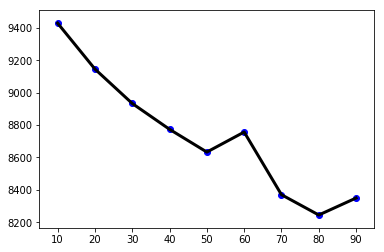

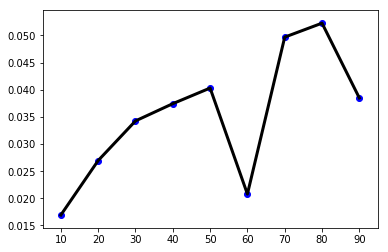

In [51]:
graph_add_line(kmeans_clusters, kmeans_costs)
graph_add_scatter(kmeans_clusters, kmeans_costs,c='blue')
plot("cost_nclusters_10_100")

graph_add_line(kmeans_clusters, kmeans_silhouette)
graph_add_scatter(kmeans_clusters, kmeans_silhouette,c='blue')
plot("silhouette_nclusters_10_100")

In [53]:
kmeans_80 = KMeans(n_clusters=80)
kmeans_80.fit(data_train)

s80 = silhouette_score(data_train,kmeans_80.labels_)
print("Silhouette Score for 80 Clusters is: " + str(s80))
d80 = davies_bouldin_score(data_train,kmeans_80.labels_)
print("Davies Bouldin Score for 80 Clusters is: " + str(d80))

print("Grupo 23")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,23)))
print("Grupo 50")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,50)))
print("Grupo 74")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,74)))

Silhouette Score for 60 Clusters is: 0.05223209502918793
Davies Bouldin Score for 60 Clusters is: 4.176719812433061
Grupo 23


/home/matheusmortatti/.local/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


[   'id|publish_date|headline_text\n',
    '576880531301801984|Sat Mar 14 23:00:11 +0000 2015|An abundance of online info can turn us into e-hypochondriacs. Or, worse, lead us to neglect getting the care we need\n',
    '576201036483833856|Fri Mar 13 02:00:07 +0000 2015|Kids = constant ear infections. Save yourself a trip to the ER w/ this:\n',
    '576170879509352449|Fri Mar 13 00:00:17 +0000 2015|Are you an e-hypochondriac? Searching symptoms online can be dangerous to your (mental) health\n',
    '576019943239503872|Thu Mar 12 14:00:31 +0000 2015|Preparing for a triathlon? You might want to try this.\n',
    '575292881876959232|Tue Mar 10 13:51:26 +0000 2015|Stages of grief: What @milesobrien teaches us about loss and being found, from @drsanjaygupta.\n',
    '573863574097018880|Fri Mar 06 15:11:52 +0000 2015|Say what? Are you one of the 1 billion at risk for hearing loss from loud music? @WHO\n',
    '573135489085116416|Wed Mar 04 14:58:43 +0000 2015|Breaking development: Deadly su

    '296061535686635520|Tue Jan 29 01:05:45 +0000 2013|Everyday Health Daily Digest is out!\n',
    '296020297356808192|Mon Jan 28 22:21:53 +0000 2013|Renew your 2013 health goals! @sarahstanley joins us @ 11 am ET TOMORROW w/ tips to stay motivated.\n',
    '296003573844684800|Mon Jan 28 21:15:26 +0000 2013|First Lady Michelle Obama on her healthy habits, getting her kids to eat their vegetables, and more:\n',
    "295967644891361280|Mon Jan 28 18:52:40 +0000 2013|RT @eatsmartbd: Save the date: #ValentinesDay twitter chat w/ me + @EverydayHealth at 1PM ET on 2/14. You'll LOVE this one! Follow #healthtalk\n",
    '295936216950534145|Mon Jan 28 16:47:47 +0000 2013|Mothers with HIV are still urged to bottle feed their babies:\n',
    "295931757604241411|Mon Jan 28 16:30:03 +0000 2013|RT @sarahstanley: Join me &amp; @everydayhealth tomorrow at 11am ET for #HealthTalk where I'll talk about motivation &amp; your 2013 goals!\n",
    '295928116042428416|Mon Jan 28 16:15:35 +0000 2013|Looking 

In [54]:
kmeans_1500 = KMeans(n_clusters=1500)
kmeans_1500.fit(data_train)

s1500 = silhouette_score(data_train,kmeans_1500.labels_)
print("Silhouette Score for 1500 Clusters is: " + str(s1500))
d1500 = davies_bouldin_score(data_train,kmeans_1500.labels_)
print("Davies Bouldin Score for 1500 Clusters is: " + str(d1500))

print("Grupo 500")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_1500.labels_,500)))
print("Grupo 300")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_1500.labels_,300)))
print("Grupo 700")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_1500.labels_,700)))

Silhouette Score for 1500 Clusters is: 0.15894040489164044
Davies Bouldin Score for 1500 Clusters is: 1.6687720566031998
Grupo 500
[   '456132810433380352|Tue Apr 15 18:11:51 +0000 2014|Ha! Us too... @MrsNRibbins @upwave\n',
    '299876578073116672|Fri Feb 08 13:45:22 +0000 2013|9 reasons to eat chocolate -- now!\n',
    '289420221876408320|Thu Jan 10 17:15:32 +0000 2013|4 hangover cures put to the test:\n']
Grupo 300
[   '301390859205742592|Tue Feb 12 18:02:35 +0000 2013|Positive BRCA Test May Not Have Negative Emotional Impact\n',
    '301356412972462080|Tue Feb 12 15:45:42 +0000 2013|Do you suffer from #migraines? Here are 15 natural remedies to try that will ease your #pain\n',
    '301348921916129280|Tue Feb 12 15:15:56 +0000 2013|10 foods that will boost your overall health, plus make your skin glow:\n',
    '301099693063168000|Mon Feb 11 22:45:35 +0000 2013|Life With Breast Cancer: You Are Strong and You are Beautiful\n',
    '301056775183007745|Mon Feb 11 19:55:03 +0000 2013|RT

/home/matheusmortatti/.local/lib/python2.7/site-packages/sklearn/metrics/cluster/unsupervised.py:342: RuntimeWarning: invalid value encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


## Affinity Propagation

In [ ]:
from sklearn.cluster import AffinityPropagation

print("Training Affinity")
affinity = AffinityPropagation()
affinity.fit(data_train)

print("Silhouette Score: " + str(silhouette_score(data_train,affinity.labels_)))
print("Davies Bouldin Score: " + str(davies_bouldin_score(data_train,affinity.labels_)))

print(len(affinity.cluster_centers_indices_))

Training hierarchical


In [7]:
print("Grupo 23")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,23)))
print("Grupo 50")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,50)))
print("Grupo 74")
pp.pprint(data_reader.GetLineGroup(GetGroup(kmeans_80.labels_,74)))

1311
